In [189]:
# import sklearn

# 1.1 Метрика качества. Определения

In [190]:
# Метрика качества – это способ численно оценить модель на основе её предсказаний

In [191]:
# Функции с суффиксом _score 
# измеряют качество модели, основываясь на том, насколько хорошо модель выполняет свою задачу. 
# Эти функции возвращают чем больше, тем лучше: чем выше значение, тем более эффективна модель. 
# Как правило, такие функции применяются для оценки производительности модели на тестовых данных или в процессе кросс-валидации.

# Основная идея: метрики с суффиксом _score оценивают положительные аспекты модели, 
# и их значения варьируются в пределах от 0 до 1 (или, в случае регрессии, от минус бесконечности до некоторого максимума), 
# где чем выше, тем лучше.

In [192]:
# Функции с суффиксом _loss или _error, 
# наоборот, измеряют ошибки модели, то есть то, насколько плохо модель работает. 
# Эти функции возвращают чем меньше, тем лучше: минимизация потерь является целью обучения модели.

# Основная идея: метрики с суффиксом _loss или _error оценивают потери или ошибки, 
# и их значения варьируются от нуля (идеальное предсказание) до бесконечности, 
# где чем меньше значение, тем лучше модель.

In [193]:
# Таким образом, функции с суффиксом _score ориентированы на оценку успешности модели, 
# а функции с суффиксом _loss /_error измеряют потери и ошибки. 
# Их выбор зависит от контекста – обучения модели или её оценки.

In [194]:
# 1. Бинарная классификация:

# Суть: В задачах бинарной классификации каждый объект может быть отнесён к одному из двух классов. 
# Это наиболее простой и интуитивно понятный случай классификации.
# Пример: Классификация писем на "спам" или "не спам", диагностика болезни: "болен" или "здоров".
 

# 2. Многоклассовая классификация (multiclass classification):

# Суть: В задачах многоклассовой классификации каждый объект может принадлежать к одному из нескольких (трёх или более) классов. 
# При этом каждый объект относится только к одному классу.
# Пример: Распознавание цифр (0-9), предсказание типа животного (собака, кошка, птица).
 

# 3. Классификация с несколькими метками (multilabel classification):

# Суть: В задачах с несколькими метками каждый объект может принадлежать одновременно нескольким классам. 
# Это усложняет задачу, так как для каждого объекта нужно предсказать не одну метку, а набор меток.
# Пример: Тегирование фотографий, где изображение может содержать одновременно несколько объектов (например, "кошка", "дерево", "здание").

# 1.2 accuracy_score()

In [195]:
# Метрика accuracy (правильность классификации) – это один из самых простых и часто используемых способов измерения того, 
# насколько хорошо модель справляется с задачей. Он измеряет долю правильных предсказаний модели среди всех предсказаний.

# accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

# Звёздочка (*) в сигнатуре функции accuracy_score() (и других функций в Python) означает, 
# что все параметры, которые следуют за ней, должны передаваться только по имени. 
# То есть такие аргументы нельзя передать позиционно, их нужно указывать явно по имени.

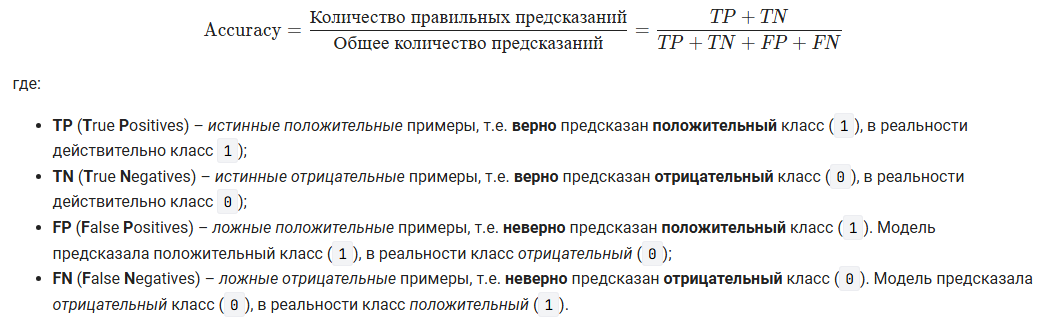

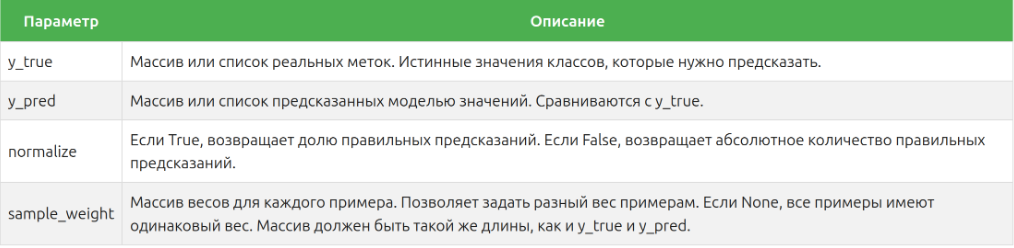

In [196]:
# Рассчитайте метрику accuracy при условии, что 
# положительный класс (1) имеет вес = 2, 
# а отрицательный класс (0) имеет вес = 1

from sklearn.metrics import accuracy_score
import numpy as np

y_true = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]

weight = np.where(np.array(y_true) == 1, 2, 1)
accuracy = accuracy_score(y_true, y_pred, sample_weight=weight)

accuracy = accuracy_score(y_true, y_pred, sample_weight=weight)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


In [197]:
y_true = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]

weights = {0: 1, 1: 2}

sample_weight = [weights[y] for y in y_true]

accuracy = accuracy_score(y_true, y_pred, sample_weight=sample_weight)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


In [198]:
y_true = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]

weights = {0: 1, 1: 2}

sample_weight = list(map(lambda x: weights[x], y_true))

accuracy = accuracy_score(y_true, y_pred, sample_weight=sample_weight)
accuracy2 = accuracy_score(y_true, y_pred, sample_weight=sample_weight, normalize=False)

print(f'Accuracy: {accuracy:.2f}')
print(f'Количество правильных предсказаний: {accuracy2}')

Accuracy: 0.68
Количество правильных предсказаний: 13.0


# 1.3  confusion_matrix()

In [199]:
# Матрица ошибок представляет собой квадратную таблицу, 
# в которой отображается количество предсказанных и фактических классов для классификационной модели. 
# В этой матрице строки представляют истинные классы (реальные метки), 
# а столбцы представляют предсказанные классы (метки, которые предсказала модель). 
# Размер матрицы соответствует количеству классов.

# confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

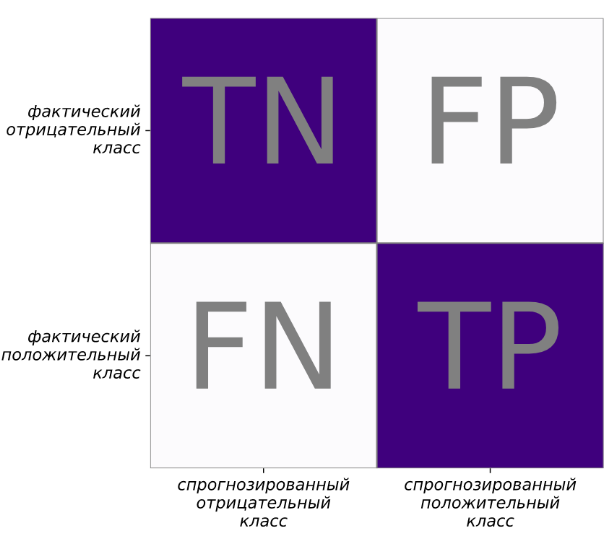

In [200]:
# В статистике ложноположительный пример (FP) называют ошибкой I рода, а ложноотрицательный (FN) – ошибкой II рода.

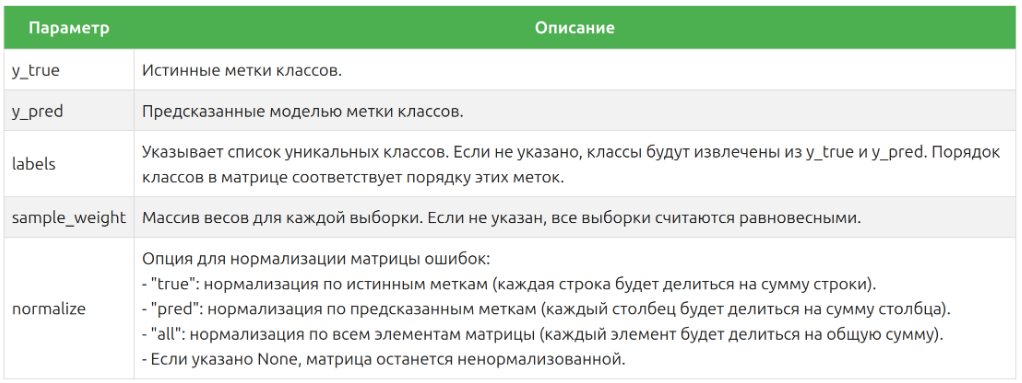

In [201]:
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 0, 0, 1, 0, 1, 1, 0]  # Истинные метки классов
y_pred = [0, 0, 0, 0, 1, 0, 1, 1, 0]  # Предсказанные метки классов

cm = confusion_matrix(y_true, y_pred)
cm

array([[5, 0],
       [1, 3]], dtype=int64)

In [202]:
y_true = [0, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0]  # Истинные метки классов
y_pred = [0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1]  # Предсказанные метки классов

cm = confusion_matrix(y_true, y_pred)
cm

array([[4, 1, 0],
       [1, 5, 0],
       [2, 1, 1]], dtype=int64)

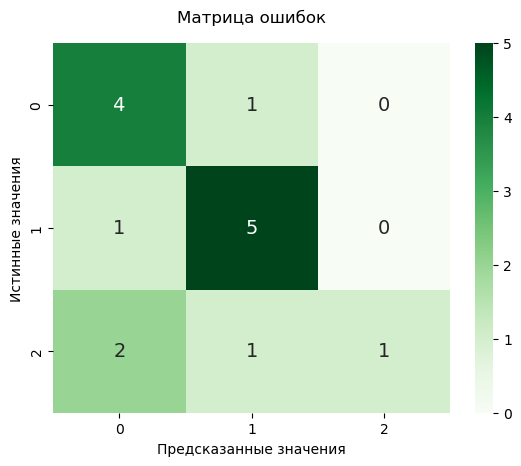

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение тепловой карты
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()

In [204]:
# Параметр labels функции confusion_matrix() 
# позволяет задать порядок классов, для которых будет построена матрица ошибок, 
# а также указать, какие именно классы включить в матрицу.

y_true = ['корова', 'лошадь', 'кошка', 'кошка', 'лошадь', 'корова', 'корова', 'лошадь', 'лошадь']
y_pred = ['лошадь', 'лошадь', 'кошка', 'кошка', 'корова', 'лошадь', 'корова', 'лошадь', 'лошадь']

cm = confusion_matrix(y_true, y_pred, labels=['лошадь', 'корова'])
cm

array([[3, 1],
       [2, 1]], dtype=int64)

In [205]:
# Параметр normalize функции confusion_matrix() управляет нормализацией матрицы ошибок. 
# Нормализация позволяет представить значения в относительных долях или процентах, а не в абсолютных значениях.

cm = confusion_matrix(y_true, y_pred, normalize='true')
cm

array([[0.33333333, 0.        , 0.66666667],
       [0.        , 1.        , 0.        ],
       [0.25      , 0.        , 0.75      ]])

In [206]:
# Вариант normalize='pred' нормализует по предсказанным меткам, то есть по столбцам.
# Каждый элемент матрицы делится на сумму элементов своей колонки. 
# Это позволяет видеть, насколько уверенно модель классифицирует примеры в каждый класс. 
# Например, если модель часто ошибочно предсказывает какой-то класс, 
# это будет отражено высокой нормализованной долей в этой колонке.

y_true = ['корова', 'лошадь', 'кошка', 'кошка', 'лошадь', 'корова', 'корова', 'лошадь', 'лошадь']
y_pred = ['лошадь', 'лошадь', 'кошка', 'кошка', 'корова', 'лошадь', 'корова', 'лошадь', 'лошадь']

cm = confusion_matrix(y_true, y_pred, normalize='pred')
cm

array([[0.5, 0. , 0.4],
       [0. , 1. , 0. ],
       [0.5, 0. , 0.6]])

In [207]:
# Если normalize='all', то происходит нормализация по всей матрице, 
# то есть каждый элемент делится на общее количество предсказаний. 
# Таким образом, каждый элемент матрицы отражает долю всех предсказаний, которые попали в конкретную ячейку. 
# Это даёт общее представление о том, насколько часто модель делает правильные предсказания или ошибается.

y_true = ['корова', 'лошадь', 'кошка', 'кошка', 'лошадь', 'корова', 'корова', 'лошадь', 'лошадь']
y_pred = ['лошадь', 'лошадь', 'кошка', 'кошка', 'корова', 'лошадь', 'корова', 'лошадь', 'лошадь']

cm = confusion_matrix(y_true, y_pred, normalize='all')
cm

array([[0.11111111, 0.        , 0.22222222],
       [0.        , 0.22222222, 0.        ],
       [0.11111111, 0.        , 0.33333333]])

In [208]:
# Воспользуемся данными датасета digits библиотеки scikit-learn.

# В датасете digits содержатся изображения рукописных цифр (от 0 до 9) размером 8x8 пикселей, 
# и каждый пиксель изображения представлен числовым значением интенсивности (оттенка серого). 
# Столбцы с именами pixel_0_0, pixel_0_1, ..., pixel_7_7 представляют собой значения интенсивности пикселей в этих изображениях.

# Столбцы названы в формате pixel_<row>_<col>, где <row> – это индекс строки (от 0 до 7), а <col> – индекс столбца (от 0 до 7).

# Каждое значение в этих столбцах – это числовое значение интенсивности пикселя, обычно в диапазоне от 0 до 16, где:

# 0 представляет собой белый цвет (отсутствие чернил).
# 16 представляет собой чёрный цвет (полностью закрашенный пиксель).


import pandas as pd
from sklearn.datasets import load_digits

# Загрузка датасета digits
digits = load_digits()

# Преобразование данных в DataFrame
# digits.data содержит массив с признаками, а digits.target - целевые значения
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)

# Добавление колонки с метками классов
df['target'] = digits.target

# Просмотр последних 5 строк DataFrame
display(df.tail())

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


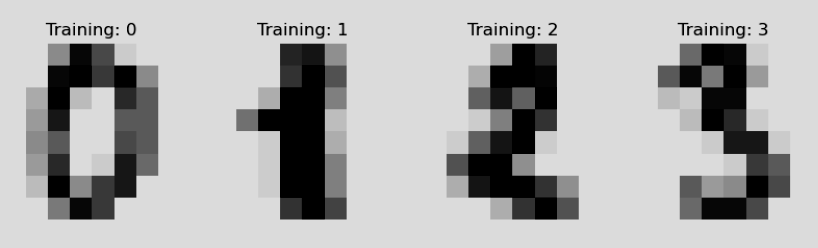

In [209]:
# Разделим данные на признаки и целевую переменную:

X = df.drop('target', axis=1)
y = df['target']

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [210]:
# Далее разделим данные на обучающие и тестовые выборки:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [211]:
# Для демонстрации работы функции confusion_matrix() будем использовать модель случайного леса. 
# Создадим объект класса RandomForestClassifier(), 
# затем обучим модель и сделаем предсказания, 
# а далее при помощи функции confusion_matrix() сформируем матрицу ошибок и выведем её на печать:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[52  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  1  0  1  0  1  0 56]]


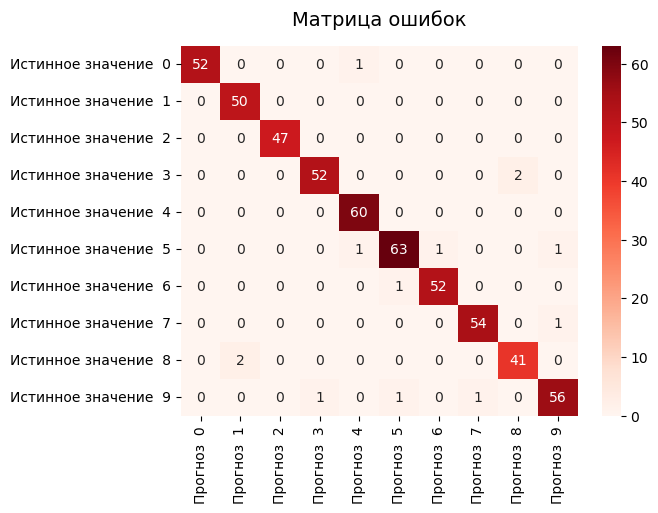

In [212]:
# Для более наглядного отображения матрицы ошибок, построим тепловую карту:

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=[f'Прогноз  {i}' for i in range(10)],
            yticklabels=[f'Истинное значение  {i}' for i in range(10)])
plt.title('Матрица ошибок', pad=15, fontsize=14)
plt.show()

In [213]:
y_true = [1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1]  # Истинные метки классов
y_pred = [2, 2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1]  # Предсказанные метки классов

cm = confusion_matrix(y_true, y_pred)

print(cm)

[[1 2 0]
 [2 3 2]
 [1 1 3]]


# 1.4 multilabel_confusion_matrix()

In [214]:
# Функция multilabel_confusion_matrix()
# используется для построения матриц ошибок для каждой метки (или класса) в многометочной классификации. 
# Она расширяет стандартную матрицу ошибок, которая обычно применяется для бинарной или многоклассовой классификации, 
# на многометочные задачи, где каждый образец может принадлежать нескольким классам одновременно.

# Многометочная классификация – это ситуация, когда один и тот же образец может иметь несколько меток. 
# Например, изображение может быть одновременно отмечено как «собака», «животное» и «питомец».
# Для каждого класса строится отдельная бинарная матрица ошибок, которая показывает, 
# как правильно или неправильно были предсказаны метки для данной категории.

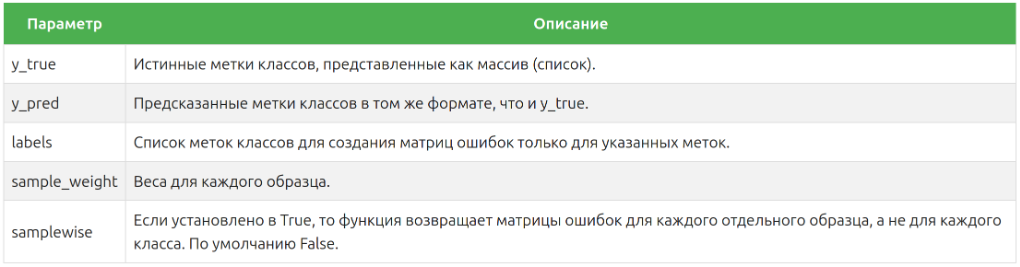

Данные для матрицы ошибок<br><br>
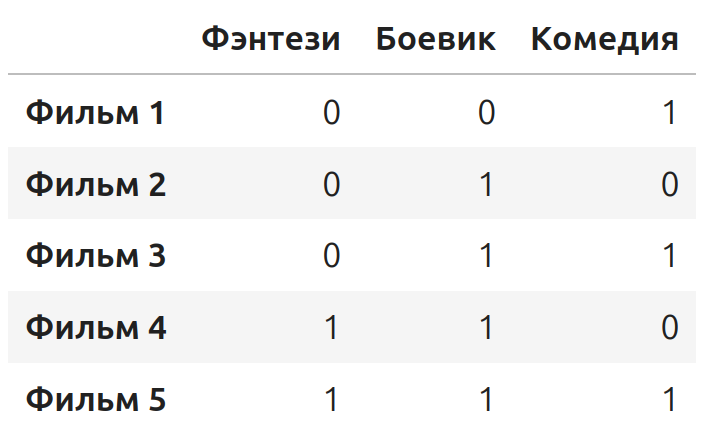

In [215]:
from sklearn.metrics import multilabel_confusion_matrix

# Истинные метки классов
y_true = [[0, 0, 1], 
          [0, 1, 0], 
          [0, 1, 1], 
          [1, 1, 0], 
          [1, 1, 1]]

# Предсказанные метки классов
y_pred = [[1, 0, 0], 
          [0, 1, 1], 
          [1, 0, 1], 
          [1, 1, 0], 
          [1, 1, 1]]

# Вычисление многометочных матриц ошибок
mcm = multilabel_confusion_matrix(y_true, y_pred)

print(mcm)

# В итоге сформировались три матрицы ошибок – по одной для каждого класса. 
# Первая матрица – для класса "Фэнтези", 
# вторая – для "Боевик" и 
# третья – для "Комедия".

[[[1 2]
  [0 2]]

 [[1 0]
  [1 3]]

 [[1 1]
  [1 2]]]


In [216]:
# Параметр samplewise функции multilabel_confusion_matrix() позволяет получать более детальную информацию о работе модели, 
# разбивая результаты по каждому образцу (sample) в наборе данных.

In [217]:
# Истинные метки классов
y_true = [[0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 1, 0], [1, 1, 1]]

# Предсказанные метки классов
y_pred = [[1, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1]]

# Вычисление многометочных матриц ошибок
mcm = multilabel_confusion_matrix(y_true, y_pred, samplewise=True)

print(mcm)

# В итоге сформировалось пять матриц ошибок – по одной для каждого примера. 
# Первая матрица – для примера "Фильм 1", 
# вторая - для примера "Фильм 2" 
# и т.д.

[[[1 1]
  [1 0]]

 [[1 1]
  [0 1]]

 [[0 1]
  [1 1]]

 [[1 0]
  [0 2]]

 [[0 0]
  [0 3]]]


0 мандарин
1 апельсин
2 лимон


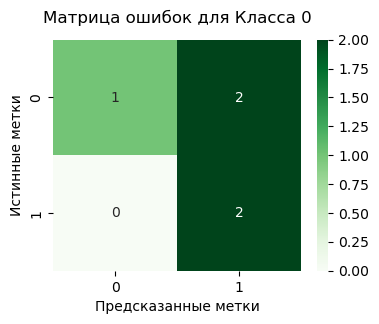

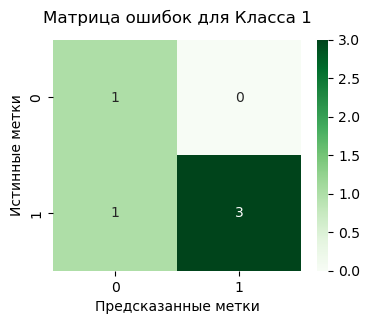

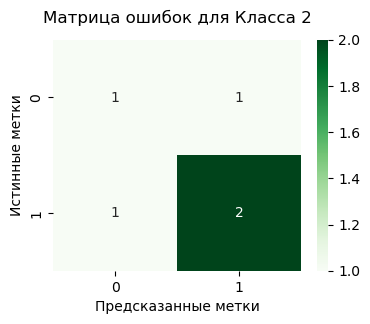

In [218]:
fruits = ['мандарин', 'апельсин', 'лимон']

for index, fruit in enumerate(fruits):
    print(index, fruit)

# Истинные метки классов
y_true = [[0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 1, 0], [1, 1, 1]]

# Предсказанные метки классов
y_pred = [[1, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1]]

mcm = multilabel_confusion_matrix(y_true, y_pred)

for i, matrix in enumerate(mcm):
    plt.figure(figsize=(4, 3))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Матрица ошибок для Класса {i}', pad=12)
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')
    plt.show()

In [219]:
from sklearn.datasets import make_multilabel_classification

# Генерация данных
X, y = make_multilabel_classification(n_samples=300, n_classes=3, 
                                      n_labels=2, n_features=5, random_state=42)

# Преобразование признаков в DataFrame
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Преобразование меток классов в DataFrame
y = pd.DataFrame(y, columns=[f'class_{i}' for i in range(y.shape[1])])

# Просмотр первых строк DataFrame
print('Признаки:', X.head(), sep='\n', end='\n\n') 
print('Целевая переменная:', y.head(), sep='\n',)

# Аргументы функции, использованные в примере:

# n_samples=300: Количество создаваемых объектов (образцов данных) = 300.
# n_classes=3: Количество классов, к которым могут относиться объекты, = 3.
# n_labels=2: Количество меток классов, которые могут быть присвоены каждому объекту = 2. Это означает, что каждый объект будет связан с двумя классами из трёх.
# n_features=5: Количество признаков (features), которые будут использоваться для описания каждого объекта = 5.
# random_state=42: Фиксирует генератор случайных чисел, чтобы каждый раз получать одни и те же данные при одинаковых параметрах (для воспроизводимости).

Признаки:
   feature_0  feature_1  feature_2  feature_3  feature_4
0        6.0       22.0        1.0        3.0        9.0
1        8.0        4.0       16.0       10.0        5.0
2        5.0       27.0       14.0        4.0       10.0
3        7.0       19.0       11.0       10.0       14.0
4        6.0       18.0       13.0        6.0       12.0

Целевая переменная:
   class_0  class_1  class_2
0        0        1        0
1        1        0        1
2        0        1        1
3        1        1        1
4        0        1        1


In [220]:
# Для демонстрации работы функции make_multilabel_classification() будем использовать модель случайного леса. 
# Создадим объект класса RandomForestClassifier(), предварительно разделив данные на обучающие и тестовые выборки. 
# Затем обучим модель и сделаем предсказания, 
# а далее при помощи функции multilabel_confusion_matrix()сформируем матрицу ошибок и выведем её на печать:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mcm = multilabel_confusion_matrix(y_test, y_pred)

print(mcm)

[[[41  8]
  [12 29]]

 [[30  9]
  [ 9 42]]

 [[35  5]
  [ 5 45]]]


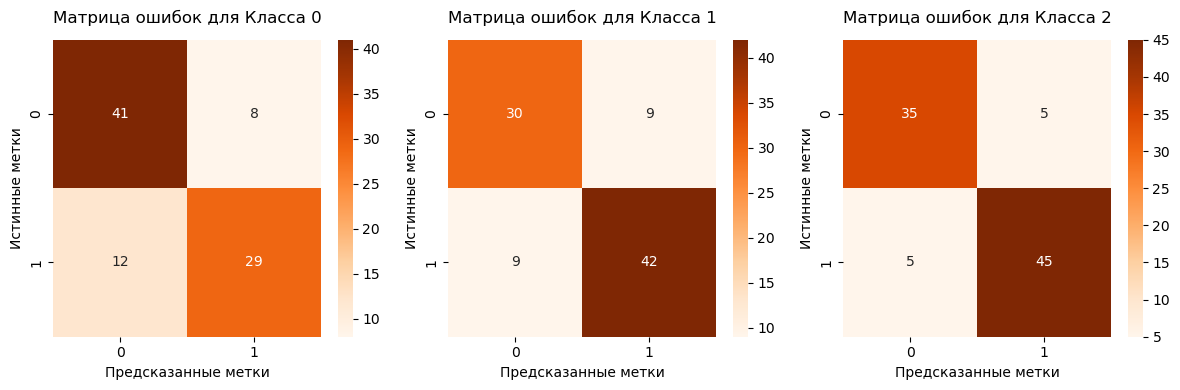

In [221]:
# И сделаем визуализацию этих данных, расположив матрицы горизонтально:

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12, 4))

gs = GridSpec(nrows=1, ncols=3, figure=fig)

for i, matrix in enumerate(mcm):
    ax = fig.add_subplot(gs[0, i])
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Oranges', ax=ax)
    ax.set_title(f'Матрица ошибок для Класса {i}', pad=12)
    ax.set_xlabel('Предсказанные метки')
    ax.set_ylabel('Истинные метки')
    
plt.tight_layout()
plt.show()

In [222]:
# Выборка y_test содержит 90 примеров, значит у нас сформировалось 90 матриц ошибок.
mcm = multilabel_confusion_matrix(y_test, y_pred, samplewise=True)
len(mcm)

90

In [223]:
# Допустим, нам нужно посмотреть на некоторые из них, например, с индексами 10, 11, 12 - выведем их на печать:

print(mcm[10:13])

[[[1 1]
  [0 1]]

 [[2 0]
  [0 1]]

 [[1 0]
  [0 2]]]


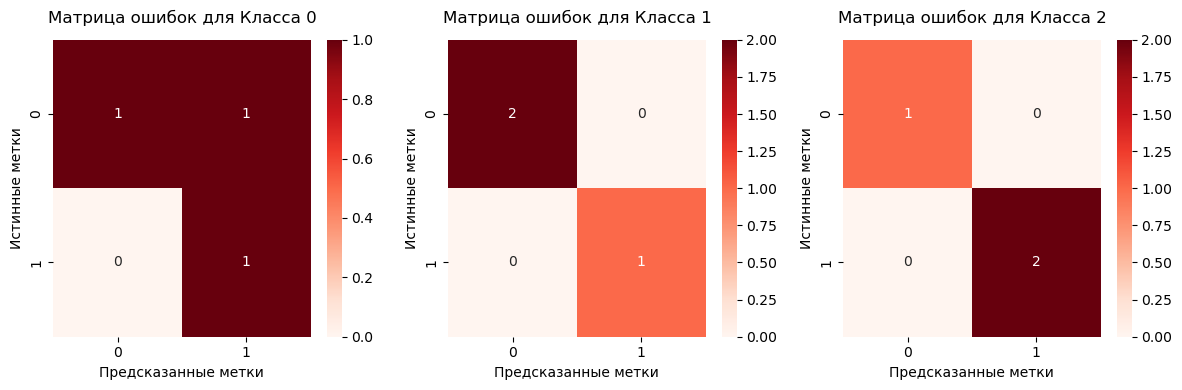

In [224]:
# И визуализируем эти матрицы:

fig = plt.figure(figsize=(12, 4))

gs = GridSpec(nrows=1, ncols=3, figure=fig)

for i, matrix in enumerate(mcm[10:13]):
    ax = fig.add_subplot(gs[0, i])
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Reds', ax=ax)
    ax.set_title(f'Матрица ошибок для Класса {i}', pad=12)
    ax.set_xlabel('Предсказанные метки')
    ax.set_ylabel('Истинные метки')
    
plt.tight_layout()
plt.show()

In [225]:
# Набор данных содержит четыре класса.  Выведите на печать матрицы ошибок только для третьего и четвёртого классов.

y_true = [[0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 1, 1], [1, 1, 0, 0], [1, 1, 1, 1]]
y_pred = [[1, 0, 0, 0], [0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0]]

print(multilabel_confusion_matrix(y_true, y_pred, samplewise=False)[2:5])
print()
print()
print(multilabel_confusion_matrix(y_true, y_pred, labels=[2,3]))

[[[1 1]
  [1 2]]

 [[2 1]
  [1 1]]]


[[[1 1]
  [1 2]]

 [[2 1]
  [1 1]]]


# 1.5 ConfusionMatrixDisplay

In [226]:
# Помимо библиотеки seaborn и её функцию heatmap() для наглядной визуализации матриц ошибок 
# в самой библиотеке scikit-learn имеется класс ConfusionMatrixDisplay, 
# который позволяет визуализировать матрицы ошибок. 
# Класс ConfusionMatrixDisplay использует инструменты библиотеки matplotlib для визуализации матриц ошибок.

# ConfusionMatrixDisplay(confusion_matrix, *, display_labels=None)

# confusion_matrix: Непосредственно сама матрица ошибок, которую необходимо визуализировать.
# display_labels: Метки для классов, которые будут отображаться на графике.

[[4 2]
 [1 3]]


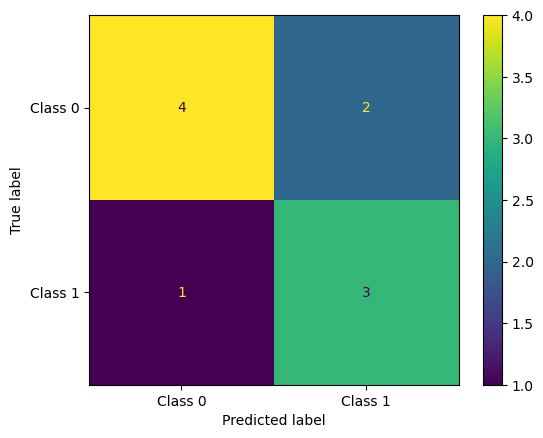

In [227]:
# Для того, чтобы произвелось графическое отображение матрицы ошибок, 
# нужно дополнительно использовать метод plot() класса ConfusionMatrixDisplay


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Истинные метки классов
y_true = np.array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

# Предсказанные моделью метки
y_pred = np.array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0])

cm = confusion_matrix(y_true, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot()

plt.show()

In [228]:
# Метод plot() 
# запускает отрисовку графика, фактически выводя матрицу ошибок на экран, 
# где каждая ячейка показывает количество предсказаний для комбинаций «истинное значение - предсказанное значение». 
# Метод plot() автоматически использует matplotlib для построения графика, 
# но сам метод принадлежит scikit-learn, 
# и именно scikit-learn вызывает отрисовку через встроенные инструменты matplotlib.

# plot(*, include_values=True, cmap='viridis', xticks_rotation='horizontal', values_format=None, 
#      ax=None, colorbar=True, im_kw=None, text_kw=None)

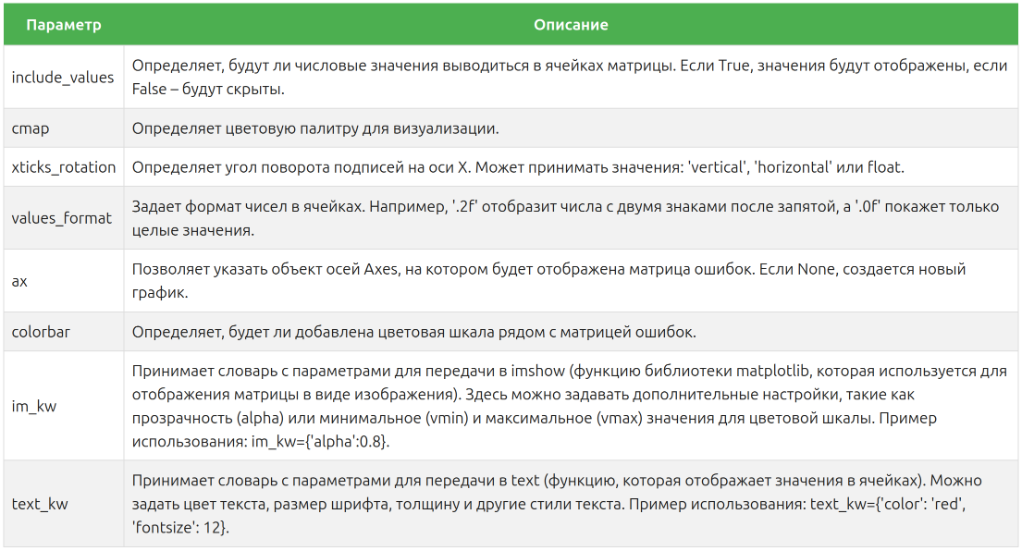

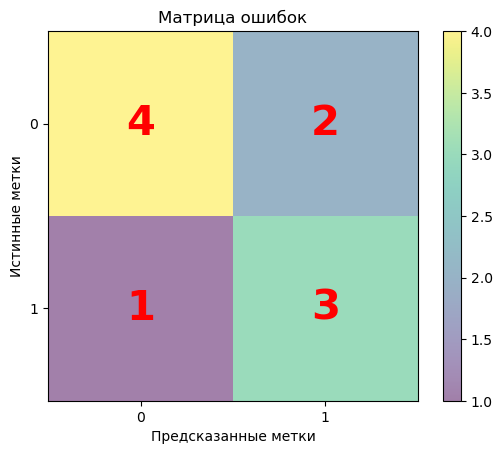

In [229]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_true = np.array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0])
y_pred = np.array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0])

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(im_kw={'alpha': 0.5},
          text_kw={'color': 'red', 
                   'fontsize': 30, 
                   'fontweight': 'bold'})

plt.title('Матрица ошибок')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()

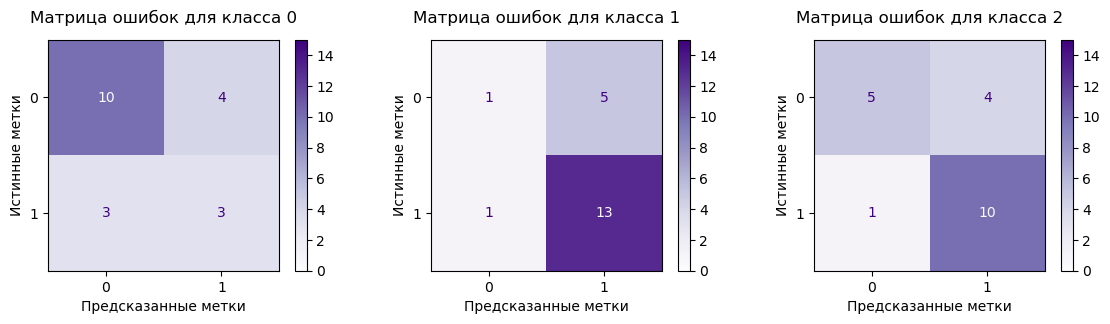

In [230]:
# Для многометочной классификации


# Генерация многометочных данных
X, y = make_multilabel_classification(n_samples=100, n_classes=3, n_labels=2, random_state=42)

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели случайного леса
model = RandomForestClassifier(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Вычисление многометочной матрицы ошибок
mcm = multilabel_confusion_matrix(y_test, y_pred)

# Визуализация многометочной матрицы ошибок для каждой метки с горизонтальным отображением
fig = plt.figure(figsize=(14, 3))
gs = GridSpec(nrows=1, ncols=3, figure=fig)

for i, matrix in enumerate(mcm):
    ax = fig.add_subplot(gs[0, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=mcm[i])
    disp.plot(cmap='Purples', im_kw={'vmin': 0, 'vmax': 15}, ax=ax)
    plt.title(f'Матрица ошибок для класса {i}', pad=12)
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')

plt.show()

In [231]:
mcm

array([[[10,  4],
        [ 3,  3]],

       [[ 1,  5],
        [ 1, 13]],

       [[ 5,  4],
        [ 1, 10]]], dtype=int64)

# 1.6 precision_score()

In [232]:
# Одной из наиболее часто используемых метрик качества для задач классификации, является метрика precision (точность). 
# Метрика precision "работает" с предсказанными образцами положительного класса. 
# Если посмотреть на матрицу ошибок для бинарной классификации, 
# то для расчёта precision задействуются значения правой части матрицы: FP (False Positive) и TP (True Positive).

In [233]:
# Точность представляет собой долю правильно классифицированных положительных образцов среди всех предсказанных положительных. 
# В основе precision лежит стремление к снижению ложноположительных срабатываний, что особенно важно, когда ошибка может иметь последствия.

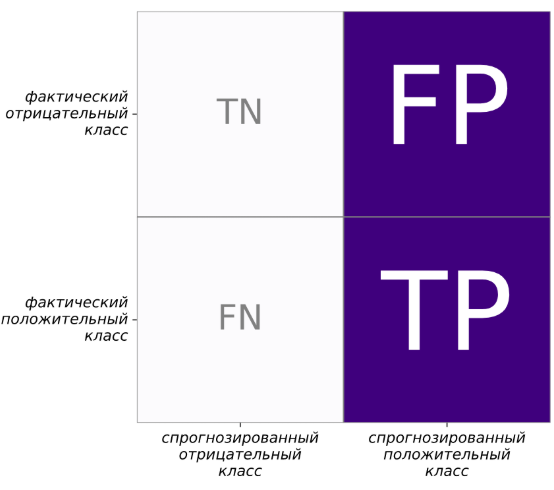

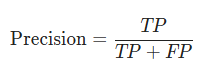

In [234]:
# где:

# TP (True Positive) – количество правильно классифицированных положительных образцов 
# (предсказан положительный класс, и фактически класс является положительным),
# FP (False Positive) – количество неправильно классифицированных положительных образцов 
# (предсказан положительный класс, но фактически класс является отрицательным).

In [235]:
# Несколько случаев, в которых важны высокие значения метрики precision:

# Оптимизация затрат и риска: 
# В задачах обнаружения мошенничества или кибербезопасности precision помогает не распылять ресурсы на ложные срабатывания. 
# Представьте, если каждая ложноположительная транзакция рассматривалась бы банком как мошенническая – 
# это привело бы к недовольству клиентов и значительным операционным издержкам.

# Фильтрация спама: 
# В фильтрах электронной почты важно, чтобы обычные письма не попадали в папку спама. 
# Precision помогает снизить количество «чистых» писем, ошибочно классифицированных как спам.

# Выявление дефектов на производстве: 
# При контроле качества в производственных процессах важно минимизировать ложные срабатывания, 
# чтобы снизить вероятность ошибочной маркировки качественного продукта как дефектного, 
# что может привести к излишним затратам и снижению эффективности.

# Рекомендательные системы в e-commerce: 
# Для точных рекомендаций товаров важно, чтобы рекомендации не приводили к раздражению пользователя из-за нерелевантных предложений. 
# Высокая точность (precision) помогает предложить только те товары, которые с наибольшей вероятностью интересуют пользователя.

# Обнаружение отказов в автомобилях: 
# В системах предупреждения о неисправностях в автомобилях ложные срабатывания 
# могут привести к лишним визитам в сервис и ухудшению восприятия пользователя. 
# Высокая точность помогает предупредить лишь о тех неисправностях, которые действительно требуют вмешательства.

# Выявление токсичных комментариев в соцсетях: 
# В системах модерации контента важно, чтобы алгоритм точно распознавал токсичные комментарии, чтобы не блокировать невинные высказывания. 
# Высокая точность позволяет снизить количество ложноположительных срабатываний и повысить качество автоматической модерации.

# Идентификация лояльных клиентов в CRM: 
# При выборе клиентов для специальных предложений важно, 
# чтобы выборка была точной и содержала только действительно заинтересованных клиентов. 
# Это помогает не переплачивать за маркетинговые акции, направленные на неподходящую аудиторию.

In [236]:
# precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None,
#                 zero_division='warn')

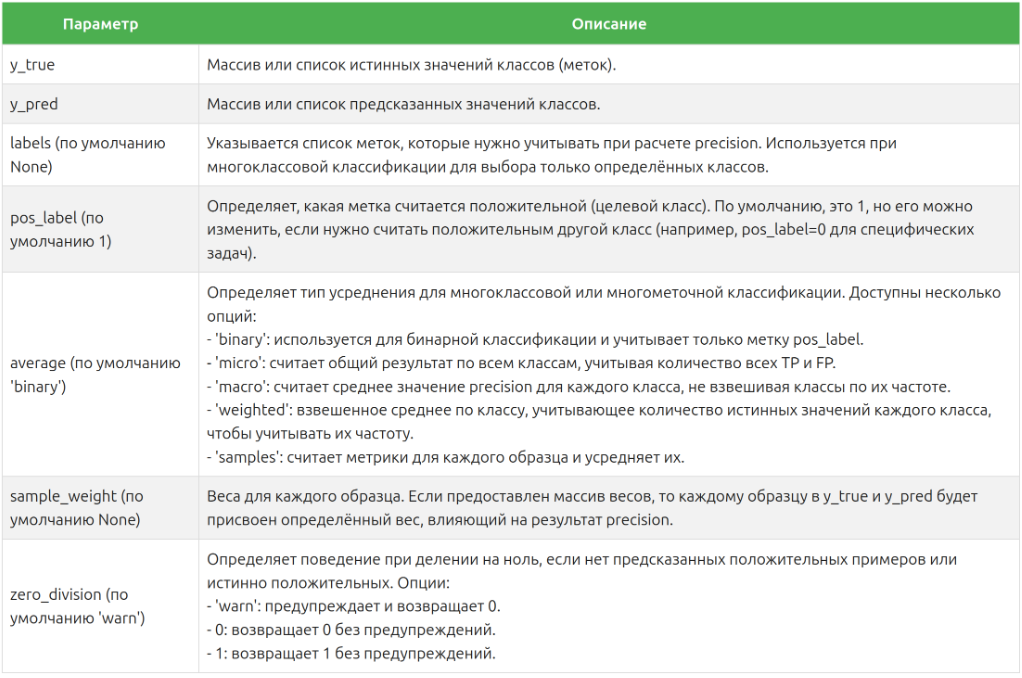

In [237]:
from sklearn.metrics import precision_score

# Истинные метки классов
y_true = [0, 1, 1, 0, 0, 0, 0, 1, 0]

# Предсказанные метки классов
y_pred = [0, 1, 1, 0, 0, 0, 1, 1, 0]

# Вычисление точности
precision = precision_score(y_true, y_pred)

print(f'Precision: {precision:.2f}')

Precision: 0.75


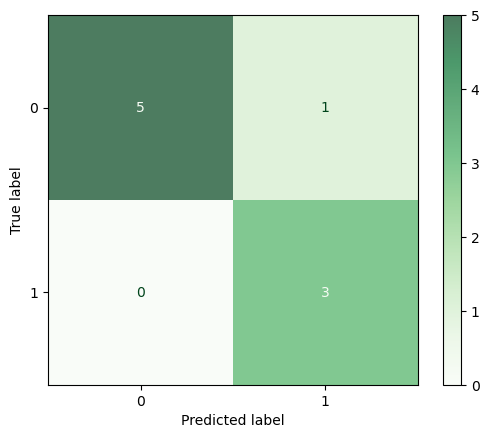

In [238]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Greens', im_kw={'alpha': 0.7})

plt.show()

In [239]:
# Сымитируем задачу классификации мошеннических транзакций. Для этого создадим датасет с большой диспропорцией двух классов:

from sklearn.datasets import make_classification

# Создаем синтетический набор данных
# Здесь класс 1 будет представлять мошеннические транзакции
X, y = make_classification(
    n_samples=1000,       # количество транзакций
    n_features=20,        # количество признаков
    n_classes=2,          # два класса: мошенническая (1) и легитимная (0)
    weights=[0.95, 0.05], # несимметричное распределение (5% мошеннических)
    random_state=42)

In [240]:
# Разделим эти данные на обучающую и тестовую выборки. 
# После чего, обучим модель случайного леса и сделаем предсказания на тестовой выборке, 
# и вычислим метрики precision и accuracy:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Обучаем модель
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Вычисляем precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Вычисляем accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Precision: 0.80
Accuracy: 0.97


In [241]:
# Данный пример позволяет наглядно увидеть, что если бы мы в оценке результата обучения модели опирались на метрику accuracy, 
# то данная модель нас вполне могла бы устроить, так как оценка, равная 0.97, является достаточно высокой. 
# Но метрика precision показывает нам, что точность модели 
# при определении положительного класса (мошеннических транзакций) составляет только 80%.

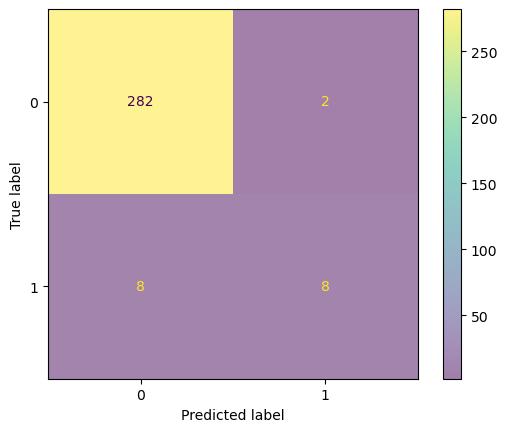

In [242]:
# Отобразим матрицу ошибок:

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(im_kw={'alpha': 0.5})

plt.show()

In [243]:
# Из 10-ти транзакций, которые модель посчитала противоправными, восемь – это мошеннические, 
# а две являются легитимными транзакциями, и отнесены к противозаконным ошибочно. 
# Соответственно, точность предсказаний модели равна 0.8.

In [244]:
# Параметр average функции precision_score()
# Параметр average функции precision_score() определяет, 
# как будут объединены метрики точности для многоклассовых и многометочных задач, 
# что позволяет гибко выбирать подход, наиболее подходящий для конкретного анализа.

# Его настройка особенно важна, если вы работаете с несимметричными задачами классификации, 
# где классы могут быть представлены в неравной пропорции или иметь разное значение для решения задачи.

## average='binary'

In [245]:
# average='binary'
# Применяется по умолчанию. 
# Используется для бинарной классификации и рассчитывает точность только для положительного класса (который помечен как 1). 
# В этом режиме precision_score() оценивает долю корректно классифицированных положительных объектов 
# относительно всех предсказанных положительных.

## average='micro'

In [246]:
# average='micro'
# Параметр average='micro' актуален, когда нужно вычислить точность по всем классам в задаче классификации с несколькими классами, 
# учитывая каждый экземпляр (True Positive и False Positive) одинаково, вне зависимости от класса. 
# Это полезно, когда требуется общий уровень точности, а не усредненная оценка по классам.

# Формула для расчета micro-average precision объединяет все истинные положительные (TP) 
# и ложные положительные (FP) предсказания по всем классам, чтобы получить общую точность.

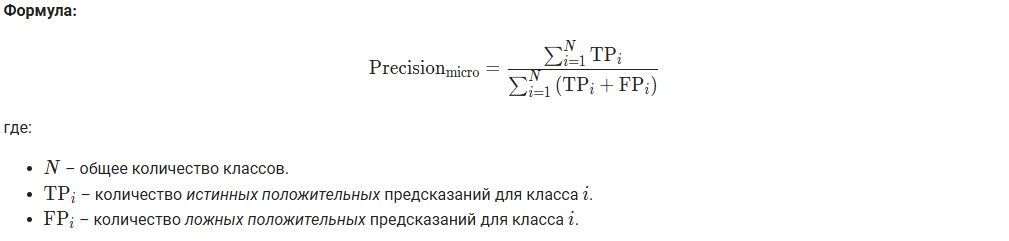

In [247]:
# Допустим, что у нас имеются два списка с истинными метками классов y_true и предсказанными метками классов y_pred:

y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
  
# Посмотрим на количество экземпляров в каждом классе в этих списках:

from collections import Counter

counts_true = Counter(y_true)
counts_pred = Counter(y_pred)

print('y_true:', counts_true)
print('y_pred:', counts_pred)

y_true: Counter({0: 45, 1: 30, 2: 30})
y_pred: Counter({0: 40, 2: 40, 1: 25})


In [248]:
# Рассчитаем метрику micro-average precision для этих данных:

from sklearn.metrics import precision_score

y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

# Вычисляем метрику точности (precision) для average='micro'
precision_micro = precision_score(y_true, y_pred, average='micro')

print(f'Micro-average Precision: {precision_micro:.3f}')

Micro-average Precision: 0.714


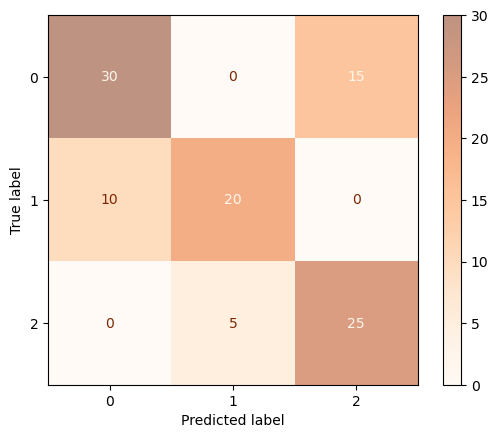

In [249]:
# Теперь давайте рассчитаем эту метрику вручную, используя приведённую выше формулу. 
# Сначала отобразим матрицу ошибок:

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Oranges', im_kw={'alpha': 0.5})

plt.show()

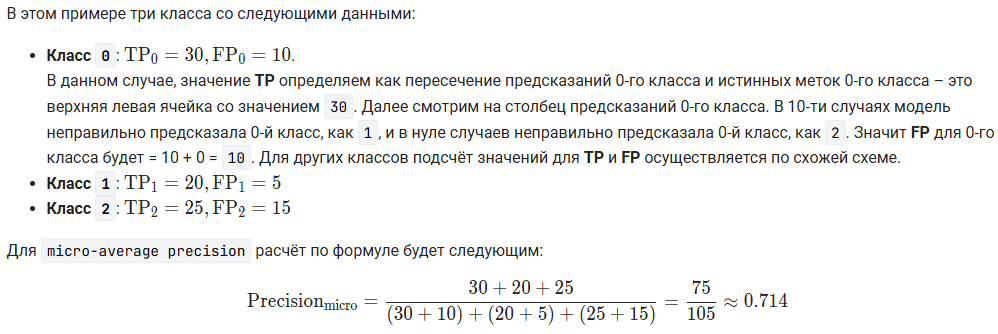

In [250]:
# Итак, параметр average='micro' считает precision для каждого истинного и ложного прогноза, 
# независимо от класса, что даёт общее представление о точности модели по всем категориям сразу.
 
# Это может быть актуально, если одна категория доминирует, и точность в целом важнее, чем для каждого класса отдельно.

## average='macro'

In [251]:
# average='macro'
# В формуле для расчета macro-average precision, для каждого класса рассчитывается его точность, 
# а затем все эти значения усредняются. 

# Macro-average не учитывает количество экземпляров в каждом классе, что позволяет избежать искажений, 
# связанных с доминированием классов с большим количеством примеров.

#  Этот подход важен, когда классы представлены неравномерно, так как он не зависит от их распределения, 
# делая акцент на равномерной важности каждого класса.

# Пример: Если модель классифицирует разные типы заболеваний, average='macro' покажет, 
# насколько точно модель предсказывает каждую болезнь, независимо от того, насколько редко или часто она встречается.

In [252]:
# Вычисляем метрику точности (precision) для average='macro'
precision_macro = precision_score(y_true, y_pred, average='macro')

print(f'Macro-average Precision: {precision_macro}')

Macro-average Precision: 0.725


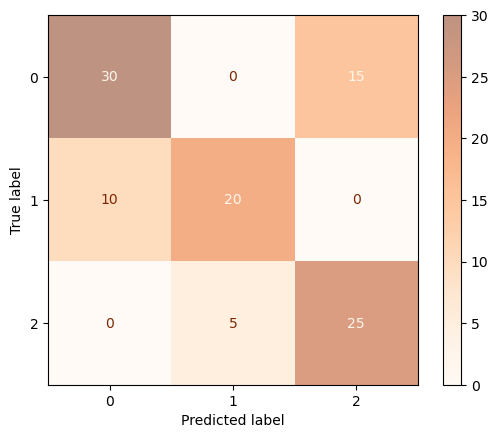

In [253]:
disp.plot(cmap='Oranges', im_kw={'alpha': 0.5})

plt.show()

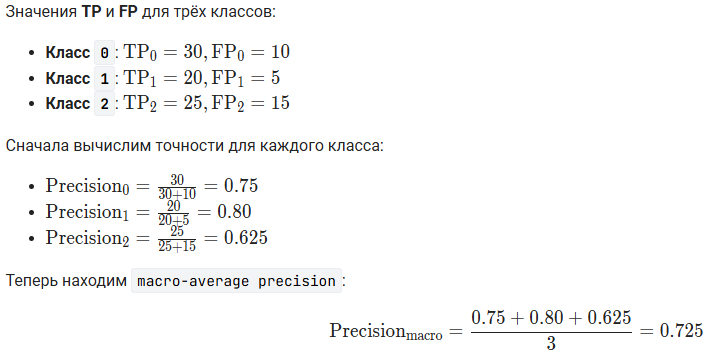

In [254]:
# Итак, macro-average precision позволяет оценить общую производительность модели, уделяя равное внимание каждому классу. 
# Это может быть важно для обеспечения того, чтобы модель хорошо работала для всех классов, независимо от их частоты в наборе данных.

## average='weighted'

In [255]:
# average='weighted'
# Параметр average='weighted' функции precision_score() усредняет метрики каждого класса с учетом их пропорции (или веса) в тестовой выборке.

# Формула для расчета weighted-average precision учитывает количество экземпляров в каждом классе 
# и позволяет получать более сбалансированную оценку, особенно в задачах с несбалансированными классами.

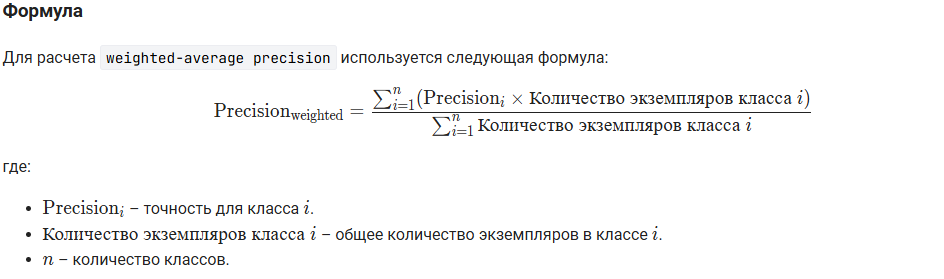

In [256]:
# Вычисляем метрику точности (precision) для average='weighted'
precision_weighted = precision_score(y_true, y_pred, average='weighted')

print(f'Weighted-average Precision: {precision_weighted:.3f}')

Weighted-average Precision: 0.729


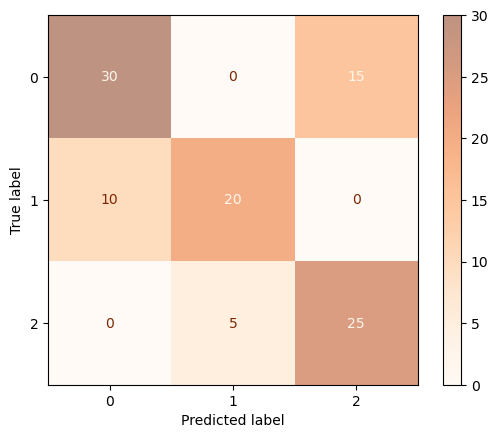

In [257]:
disp.plot(cmap='Oranges', im_kw={'alpha': 0.5})

plt.show()

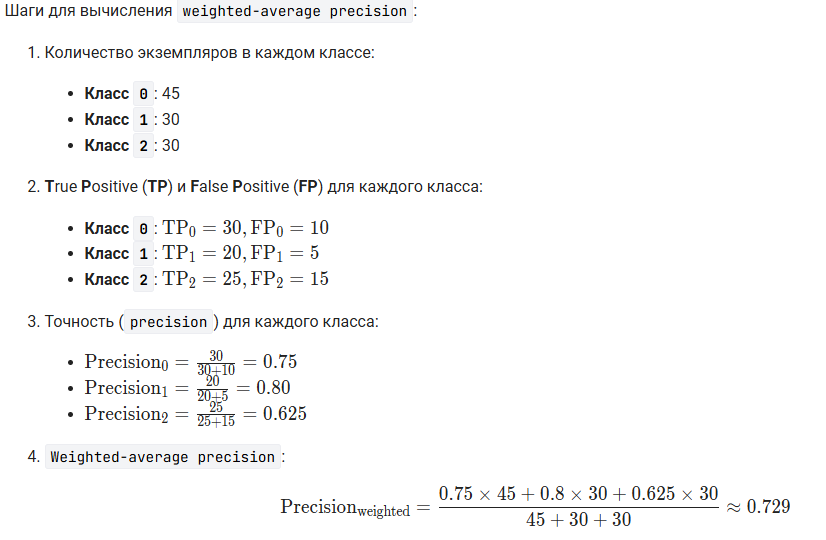

In [258]:
# Интерпретация метрики weighted-average precision:

# Если weighted-average precision высокое, это означает, 
# что модель хорошо предсказывает наиболее распространенные классы, так как их точность имеет наибольший вес.

# Если значение weighted-average precision низкое, 
# то модель не справляется с точными предсказаниями для крупных классов, что может быть критично, 
# если доминирующие классы имеют высокий практический интерес.

# Таким образом, weighted-average precision полезен, когда приоритет отдается более крупным классам, 
# а не редким, и важно, чтобы точность по основным классам была максимальной.

## average='samples'

In [259]:
# average='samples'
# Подходит для многометочной классификации, в которой каждому образцу может быть назначено несколько меток. 
# В этом случае точность рассчитывается для каждого образца, а затем усредняется по всем образцам. 

# Такой подход важен для задач, где одно наблюдение может принадлежать сразу нескольким классам, 
# например, как в классификации текстов по нескольким тематикам.

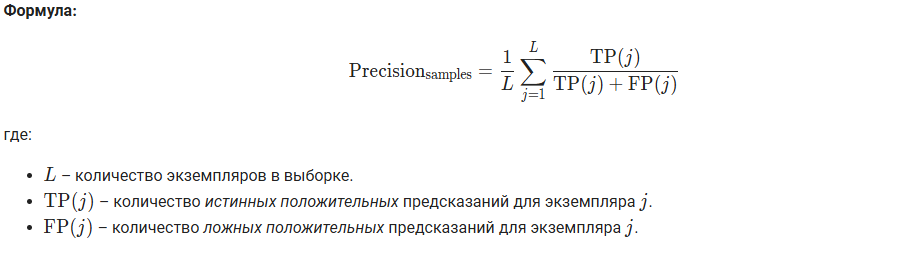

In [260]:
# Например, у нас имеются следующие два массива с истинными и предсказанными метками:

import numpy as np

y_true = np.array([[1, 0, 1],  # Образец 1 принадлежит к классам 0 и 2
                   [0, 1, 0],  # Образец 2 принадлежит к классу 1
                   [1, 1, 0],  # Образец 3 принадлежит к классам 0 и 1
                   [0, 0, 1]]) # Образец 4 принадлежит к классу 2

y_pred = np.array([[1, 0, 0],  # Образец 1 предсказан с классом 0
                   [0, 1, 0],  # Образец 2 предсказан с классом 1
                   [1, 0, 1],  # Образец 3 предсказан с классами 0 и 2
                   [0, 0, 1]]) # Образец 4 предсказан с классом 2

In [261]:
# При помощи функции precision_score() с параметром average='samples' рассчитаем точность:

from sklearn.metrics import precision_score

precision_samples = precision_score(y_true, y_pred, average='samples')

print(f'Samples-average Precision: {precision_samples:.3f}')

Samples-average Precision: 0.875


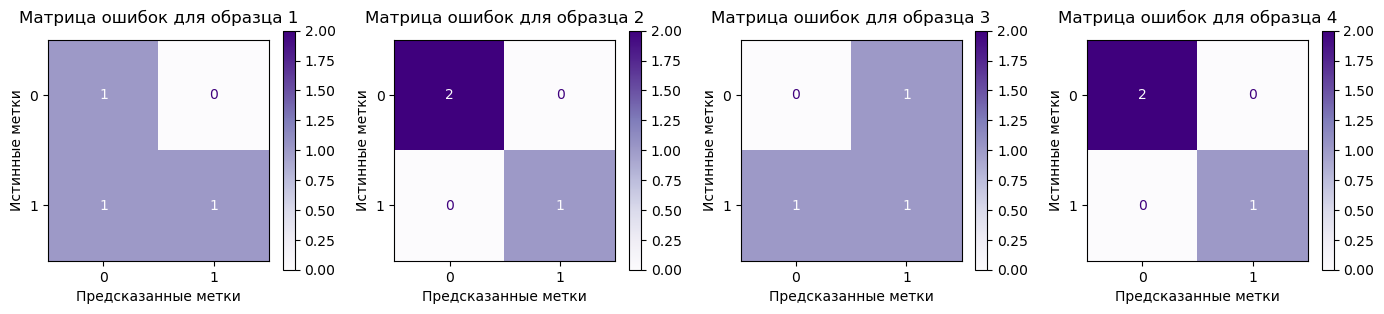

In [262]:
# Давайте также вручную рассчитаем точность. 
# Сначала отобразим матрицу ошибок для каждого образца:

from matplotlib.gridspec import GridSpec
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

# Вычисление многометочной матрицы ошибок
mcm = multilabel_confusion_matrix(y_true, y_pred, samplewise=True)

# Визуализация многометочной матрицы ошибок для каждого образца с горизонтальным отображением
fig = plt.figure(figsize=(14, 3))
gs = GridSpec(nrows=1, ncols=len(mcm), figure=fig)

for i, matrix in enumerate(mcm):
    ax = fig.add_subplot(gs[0, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=mcm[i])
    disp.plot(cmap='Purples', im_kw={'vmin': 0, 'vmax': 2}, ax=ax)
    plt.title(f'Матрица ошибок для образца {i+1}', pad=12)
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')

plt.tight_layout()
plt.show()

In [263]:
# В данном случае сформирована матрица по каждому образцу, но без разбивки на классы, 
# то есть в каждой матрице ошибки и совпадения показаны совокупно по всем классам.

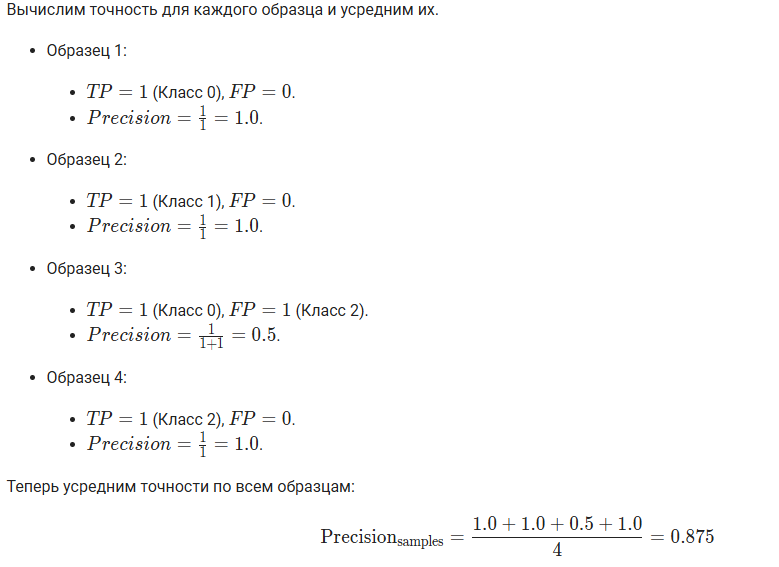

## Задачи

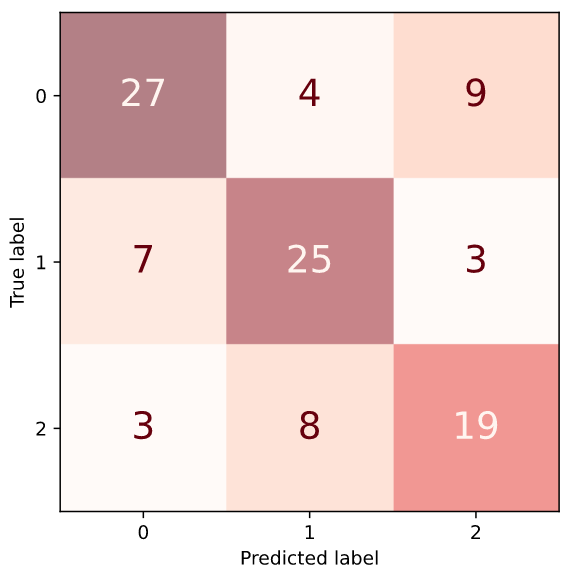

In [264]:
micro = (27 + 25 + 19) / (37 + 37 + 31)
macro = (27 / 37 + 25 / 37 + 19 / 31) / 3
weighted = ((27 / 37) * 40 + (25 / 37) * 35 + (19 / 31) * 30) / (40 + 35 + 30)

print(f'micro: {micro:.3f}')
print(f'macro: {macro:.3f}')
print(f'weighted: {weighted:.3f}')

micro: 0.676
macro: 0.673
weighted: 0.678


In [265]:
# Даны два списка:

# y_true – фактические метки;
# y_pred – предсказанные метки.

# Рассчитайте метрики accuracy и precision

import numpy as np

y_true = [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]   
y_pred = [1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0]   

y_true = np.array(y_true)
y_pred = np.array(y_pred)

accuracy = np.sum(y_true == y_pred) / len(y_true)
precision = np.sum(y_true[np.where(y_pred == 1)] == y_pred[np.where(y_pred == 1)]) / \
            np.sum(y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')

Accuracy: 0.79
Precision: 0.75


In [266]:
# Даны два списка:

# y_true – фактические метки;
# y_pred – предсказанные метки.
# Класс 3 является положительным классом.

# Рассчитайте точность (precision).

y_true = [3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3]   
y_pred = [2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3]   

precision = precision_score(y_true, y_pred, pos_label=3)

print(f'Precision: {precision:.3f}')

Precision: 0.857


In [267]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=2000,                 # количество примеров
                           n_features=10,                  # количество признаков
                           n_classes=4,                    # количество классов
                           n_informative=4,                # количество информативных признаков 
                           weights=[0.7, 0.15, 0.1, 0.05], # веса классов
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

print(cm, end='\n\n')
print(f'Micro-average Precision: {precision_micro:.3f}')
print(f'Macro-average Precision: {precision_macro:.3f}')
print(f'Weighted-average Precision: {precision_weighted:.3f}')

[[234  20  17   7]
 [ 20  35   4   2]
 [ 14   1  23   3]
 [  4   5   3   8]]

Micro-average Precision: 0.750
Macro-average Precision: 0.581
Weighted-average Precision: 0.756


In [268]:
from sklearn.datasets import make_multilabel_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# добавьте необходимые импорты
from sklearn.metrics import multilabel_confusion_matrix, precision_score

num_1, num_2, num_3, num_4 = map(int, '500 3 2 42'.split())
X, y = make_multilabel_classification(n_samples=num_1, # количество примеров
                                      n_classes=num_2, # количество классов
                                      n_labels=num_3,  # Среднее количество меток (классов), которые  
                                                       # присваиваются каждому наблюдению.
                                      random_state=num_4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Продолжите написание кода здесь

mcm = multilabel_confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='samples', zero_division=0)

print(mcm)
print()
print('%.3f' % precision)

[[[69 27]
  [21 33]]

 [[40 21]
  [20 69]]

 [[39 24]
  [17 70]]]

0.617


In [269]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

num_1, num_2, num_3, num_4, num_5, num_6, num_7, num_8 = map(int, '2000 10 3 4 7 2 1 42'.split())
X, y = make_classification(n_samples=num_1,                        # количество примеров
                           n_features=num_2,                       # количество признаков
                           n_classes=num_3,                        # количество классов
                           n_informative=num_4,                    # количество информативных признаков 
                           weights=[num_5/10, num_6/10, num_7/10], # веса классов
                           random_state=num_8)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Дерево решений
model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc.fit(X_train, y_train)
y_pred_dtc = model_dtc.predict(X_valid)

# Случайный лес
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_valid)

# Наивный байес с распределением Гаусса
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_valid)

precision_weighted_dtc = precision_score(y_valid, y_pred_dtc, average='weighted')
precision_weighted_rfc = precision_score(y_valid, y_pred_rfc, average='weighted')
precision_weighted_gnb = precision_score(y_valid, y_pred_gnb, average='weighted')

print(f'WA Precision для DecisionTreeClassifier: {precision_weighted_dtc:.3f}')
print(f'WA Precision для RandomForestClassifier: {precision_weighted_rfc:.3f}')
print(f'WA Precision для GaussianNB: {precision_weighted_gnb:.3f}', end='\n\n')
print()

y_pred = model_rfc.predict(X_test)
precision_best_estimator = precision_score(y_test, y_pred, average='weighted')

print('%.3f' % precision_best_estimator)

WA Precision для DecisionTreeClassifier: 0.802
WA Precision для RandomForestClassifier: 0.865
WA Precision для GaussianNB: 0.780


0.814


# recall_score()

In [270]:
# Функция recall_score() библиотеки scikit-learn – это один из ключевых инструментов для оценки качества модели классификации, 
# особенно в тех задачах, где важна полнота (recall).

# Полнота измеряет, какую долю всех реальных положительных примеров модель правильно предсказала. 
# В тех ситуациях, где важно минимизировать количество пропущенных положительных случаев, 
# полнота становится решающим критерием качества модели.